In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import datetime
import math

In [2]:
df_req = pd.read_csv("request.csv")
#df_ride = pd.read_csv("ride.csv")

In [3]:
#df_ride.isnull().sum(axis = 0)
#df_req.isnull().sum(axis = 0)

In [4]:
#df_req.info()


In [3]:
#NOTE: duration estimate is not available for cancelled_at rows (trips that have passenger cancelled scenario)
df_req_cpy = df_req.copy()
df_ride_cpy = df_ride.copy()
#df_req.drop("cancelled_at_time", axis = 1, inplace = True)

In [5]:
df_req["cancelled_at"] = pd.to_datetime(df_req["cancelled_at"])
df_req["created_at"] = pd.to_datetime(df_req["created_at"])
df_req["created_at_day"] = [d.date() for d in df_req["created_at"]]
df_req["created_at_hour"] = [d.time() for d in df_req["created_at"]]
#to replace NaT with zeros
df_req["cancelled_at_day"] = [d.date() if pd.isnull(d) != True else 0 for d in df_req["cancelled_at"]]
#df_req["cancelled_at_day"] = pd.to_datetime(df_req["cancelled_at_day"])
df_req["cancelled_at_hour"] =[d.time() if pd.isnull(d) != True else 0 for d in df_req["cancelled_at"]]

#df_req["cancelled_at_hour"] = pd.to_datetime(df_req["cancelled_at_hour"])
df_req["cancelled_at"] = [d if pd.isnull(d) != True else 0 for d in df_req["cancelled_at"]]


#Created_at time features (reducing the granularity for the ease of analysis)
df_req['Cre_Day_No_Week'] = df_req['created_at'].dt.dayofweek
df_req['Cre_Day_Name'] = df_req['created_at'].dt.weekday_name
df_req['Cre_Week_No'] = df_req['created_at'].dt.week
df_req['Cre_HourOfDay'] = df_req['created_at'].dt.hour
df_req['Cre_MinOfDay'] = df_req['created_at'].dt.minute

#run this again to prevent errors
#df_req["cancelled_at_hour"] =[d.time() if d != 0 else 0 for d in df_req["cancelled_at"]]   #latest working - try if things dont work
#replace 0 with np.nan so that week num is intuitive and for further breakdown of date and time
df_req["cancelled_at"] = df_req["cancelled_at"].map(lambda x: np.nan if x == 0 else x)

#Cancelled_at time features (reducing the granularity for the ease of analysis)
df_req['Ccl_Day_No_Week'] = df_req['cancelled_at'].dt.dayofweek
df_req['Ccl_Day_Name'] = df_req['cancelled_at'].dt.weekday_name
df_req['Ccl_Week_No'] = df_req['cancelled_at'].dt.week
df_req['Ccl_HourOfDay'] = df_req['cancelled_at'].dt.hour
df_req['Ccl_MinOfDay'] = df_req['cancelled_at'].dt.minute


In [16]:
#(df['date'] > start_date) & (df['date'] <= end_date)
#df_req[(df_req["cancelled_at_day"] >= (pd.to_datetime('2019-09-01').date())) & (df_req["cancelled_at_day"] <= (pd.to_datetime('2019-09-30').date()))]["passenger_payment_mean"].value_counts()
#df_req.tail()
#df_req = df_req.drop(["created_at_hour", "cancelled_at_hour"], axis = 1)
#print(df_req[["created_at_day","Cre_Day_No_Week"]].drop_duplicates())
df_req.head()

,id_request,id_passenger,id_city,from_latitude,from_longitude,to_latitude,to_longitude,created_at,cancelled_at,timedout_at,...,Cre_Day_No_Week,Cre_Day_Name,Cre_Week_No,Cre_HourOfDay,Cre_MinOfDay,Ccl_Day_No_Week,Ccl_Day_Name,Ccl_Week_No,Ccl_HourOfDay,Ccl_MinOfDay
0,3513924914,2590587260,1,19.593987,-99.039326,19.578557,-99.041541,2019-09-19 04:07:56,2019-09-19 04:08:01,NaN,...,3,Thursday,38,4,7,3.0,Thursday,38.0,4.0,8.0
1,1594446343,1501665959,1,19.303307,-98.886432,19.261320,-98.878055,2019-09-19 22:44:43,0,NaN,...,3,Thursday,38,22,44,NaN,NaN,NaN,NaN,NaN
2,2312709661,1546836297,1,19.326330,-99.121689,19.310036,-99.124487,2019-09-19 23:00:37,0,NaN,...,3,Thursday,38,23,0,NaN,NaN,NaN,NaN,NaN
3,1498373688,2884063389,1,19.401755,-99.175365,19.400671,-99.188342,2019-09-20 16:31:24,0,NaN,...,4,Friday,38,16,31,NaN,NaN,NaN,NaN,NaN
4,197696634,2893722658,1,19.392388,-99.057337,19.370834,-99.005069,2019-09-20 23:26:56,2019-09-20 23:29:31,NaN,...,4,Friday,38,23,26,4.0,Friday,38.0,23.0,29.0


In [8]:
#df_req[df_req["cancelled_at_day"]]
#df_req["created_at_day"].drop_duplicates()
#df_req["created_at_day"].value_counts()
df_req["cancelled_at"] = [d if pd.isnull(d) != True else 0 for d in df_req["cancelled_at"]]
#whole data payment proportion
pay_array = df_req["passenger_payment_mean"].value_counts()
print("Total Payment proportion of CC to whole is {}".format(round(pay_array[1]/(pay_array[0] + pay_array[1]) * 100,3)))

#cancelled request payment mode summary
pay_cancel_array = df_req[df_req["cancelled_at"] != 0]["passenger_payment_mean"].value_counts()
print("Cancelled Payment proportion of CC to whole is {}".format(round(pay_cancel_array[1]/(pay_cancel_array[0] + pay_cancel_array[1]) * 100,3)))

#Successful request payment mode summary
pay_success_array = df_req[df_req["cancelled_at"] == 0]["passenger_payment_mean"].value_counts()
print("Successful Payment proportion of CC to whole is {}".format(round(pay_success_array[1]/(pay_success_array[0] + pay_success_array[1]) * 100,3)))

Total Payment proportion of CC to whole is 21.15
Cancelled Payment proportion of CC to whole is 18.003
Successful Payment proportion of CC to whole is 23.235


In [9]:
#df_req.info()
#type(df_req["created_at_day"][0])
#pd.to_datetime('2019-09-01').date()
#time = np.array(df_req["cancelled_at_day"].value_counts().index[1:])
#value = np.array(df_req["cancelled_at_day"].value_counts().values[1:])
time_created_agg = list(df_req["created_at_day"].value_counts().index)
value_created_agg = list(df_req["created_at_day"].value_counts().values)
time_cancelled_agg = list(df_req["cancelled_at_day"].value_counts().index)
value_cancelled_agg = list(df_req["cancelled_at_day"].value_counts().values)
#cancelled_agg_dict = {"time":time, "value":value} 
#pd.to_datetime('2019-09-30')
#sns.lineplot(x= time,y= value ,sort=True)
#df_req[["from_latitude","from_longitude","to_latitude", "to_longitude"]].to_excel("location_request.xlsx")

In [10]:
#function to zip lists
def tupler(obj1, obj2):
    new_list = []
    for a,b in zip(obj1, obj2):
        new_list.append((a,b))
    return new_list

In [11]:
appended_list = tupler(time_created_agg, value_created_agg)
appended_list.sort()
appended_list_cancel = tupler(time_cancelled_agg[1:], value_cancelled_agg[1:])
appended_list_cancel.sort()

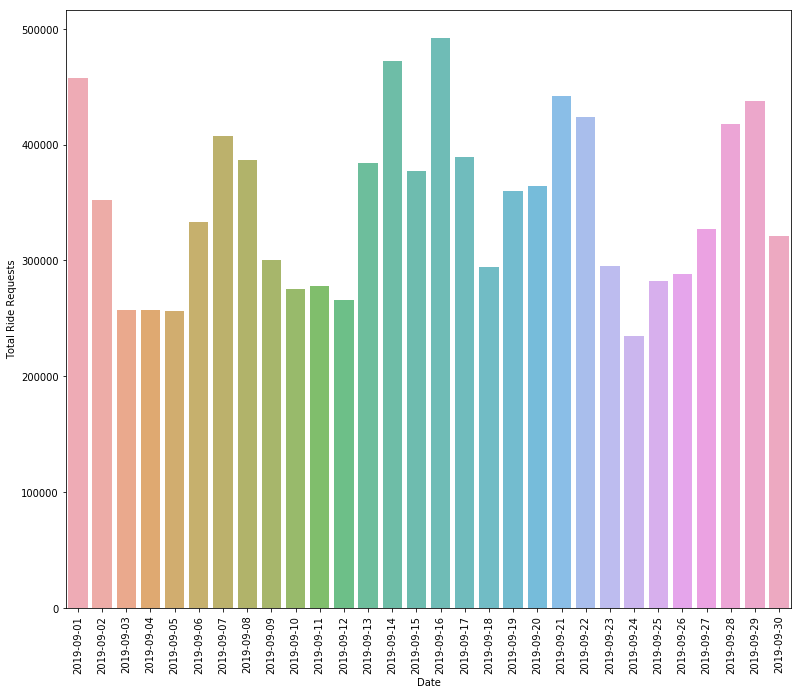

<Figure size 720x576 with 0 Axes>

In [23]:
#print([appended_list[i][0] for i in range(len(appended_list))])
#plt.bar([appended_list[i][0] for i in range(len(appended_list))],[appended_list[i][1] for i in range(len(appended_list))])
#ax = sns.scatterplot(x='day', y='miles_walked', data=dataset, hue='day_category')  --- HUE PLOT
ax = sns.barplot([appended_list[i][0] for i in range(len(appended_list))],[appended_list[i][1] for i in range(len(appended_list))], alpha=0.8)
ax.set_xlabel('Date', fontsize = 10)
ax.set_ylabel('Total Ride Requests',fontsize = 10)
plt.rcParams['figure.figsize'] = [13, 11]
plt.xticks(rotation = 90)
plt.figure(figsize=(10,8))
x_list = [appended_list[i][0] for i in range(len(appended_list))]
ax.set_xticklabels([str(x_list[i]) for i in range(len(x_list))], fontsize=10)
plt.show()
#a = list(df_req["cancelled_at_day"].value_counts().index[1:])
#a.sort()
#time_created_agg = list(df_req["created_at_day"].value_counts().index[1:])

<B> It is well known that number of requests are high during weekends. However, on 16th of September 2019, which falls on Monday, has more requests. It is <font color='red'> MEXICO'S INDEPENDENCE DAY!!!!! </B> </font>

In [24]:
#look at the last tuples showing dates from October (1st and 11th of October)
appended_list_cancel.sort()
print(appended_list_cancel)
print("\n"*2)
print("October dates on which cancellations have been made: {0}, {1}".format(appended_list_cancel[-1][0],appended_list_cancel[-2][0]))

[(datetime.date(2019, 9, 1), 218164), (datetime.date(2019, 9, 2), 155257), (datetime.date(2019, 9, 3), 94017), (datetime.date(2019, 9, 4), 83519), (datetime.date(2019, 9, 5), 92449), (datetime.date(2019, 9, 6), 123243), (datetime.date(2019, 9, 7), 168031), (datetime.date(2019, 9, 8), 163166), (datetime.date(2019, 9, 9), 118232), (datetime.date(2019, 9, 10), 107417), (datetime.date(2019, 9, 11), 108272), (datetime.date(2019, 9, 12), 92234), (datetime.date(2019, 9, 13), 158142), (datetime.date(2019, 9, 14), 214374), (datetime.date(2019, 9, 15), 153059), (datetime.date(2019, 9, 16), 232001), (datetime.date(2019, 9, 17), 183899), (datetime.date(2019, 9, 18), 116382), (datetime.date(2019, 9, 19), 159512), (datetime.date(2019, 9, 20), 144487), (datetime.date(2019, 9, 21), 194489), (datetime.date(2019, 9, 22), 186639), (datetime.date(2019, 9, 23), 107608), (datetime.date(2019, 9, 24), 68338), (datetime.date(2019, 9, 25), 97759), (datetime.date(2019, 9, 26), 99411), (datetime.date(2019, 9, 27)

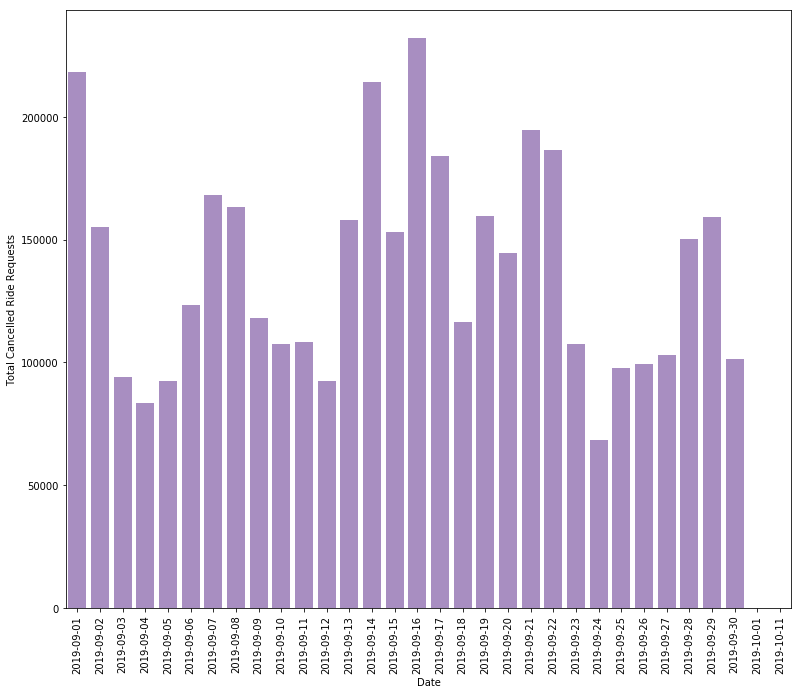

<Figure size 720x576 with 0 Axes>

In [25]:
ax = sns.barplot([appended_list_cancel[i][0] for i in range(len(appended_list_cancel))], [appended_list_cancel[i][1] for i in range(len(appended_list_cancel))], alpha=0.8, color=color[4])
ax.set_xlabel('Date', fontsize = 10)
ax.set_ylabel('Total Cancelled Ride Requests',fontsize = 10)
plt.rcParams['figure.figsize'] = [13, 11]
plt.xticks(rotation = 90)
plt.figure(figsize=(10,8))
x_list_cancel = [appended_list_cancel[i][0] for i in range(len(appended_list_cancel))]
ax.set_xticklabels([str(x_list_cancel[i]) for i in range(len(x_list_cancel))], fontsize=10)
plt.show()

<B> It can be seen from the above figure that Weekends has the most cancellation requests when compared to weekdays. However, similiar to the scenario of total request analysis, the cancellation rate is also higher on  <font color='red'> 16th September 2019 </font>. Also, one important thing to note here is the last 2 bars (almost invisible due to scale) there are dates of cancellation that has happened in the month of October 2019</B>

<I> There are 3 reasons for this:  
* Ride Request should be created by the end of night around 23:XX hour and cancelled on the next day which is 1st of October.   
* Possible Fraud or Scam   
* System error (data capture error)  
</I>

<B><I> However, there is one record on <font color='blue'> 11th of October 2019</font>. We will look into it later</I><B>


In [26]:
#find rows where duration estimate is missing (w.k.t cancelled request have missing duration estimate, however, 4872 rows successful rows have been missing)
#play with below 2 sceenarios to get necessary results: Note to self
#df_req["cancelled_at"] = df_req["cancelled_at"].map(lambda x: np.nan if x == 0 else x)
#df_req["cancelled_at"] = [d if pd.isnull(d) != True else 0 for d in df_req["cancelled_at"]]

#len(df_req.loc[((df_req["cancelled_at"] != 0) & (df_req["duration_estimate"] == np.nan))])

#df_req["duration_estimate"].isnull().sum(axis = 0)

#len(df_req.loc[df_req["cancelled_at"] == 0])

#df_req["duration_estimate"][1] == np.nan

#df_req[["cancelled_at","duration_estimate"]][0:100]

#len(df_req.loc[df_req["cancelled_at"]])
#len(df_req["cancelled_at"].notnull())
#df_req["cancelled_at"][1].notnull()

In [27]:
print(type(df_req["cancelled_at_hour"][0]))
print(type(df_req["cancelled_at_day"][0]))

#needs conversion to NAT (null values linked to datatime)
print(type(df_req["cancelled_at_hour"][1]))
print(type(df_req["cancelled_at_day"][1]))

<class 'datetime.time'>
<class 'datetime.date'>
<class 'int'>
<class 'int'>


In [28]:
#df_req["cancelled_at_day"] = pd.to_datetime(df_req["cancelled_at_day"])
#df_req["cancelled_at_hour"] = pd.to_datetime(df_req["cancelled_at_hour"])
#df_req["cancelled_at"] = pd.to_datetime(df_req["cancelled_at"])

In [29]:
#df_req.loc[(df_req["cancelled_at_day"] >= pd.datetime.date('2019-10-01')) & (df_req["cancelled_at_day"] <= pd.datetime.date('2019-10-11'))]
#print(df_req["created_at_day"][0],df_req["created_at_hour"][0])

In [30]:
df_req_cre_ccl = df_req[["created_at_day","created_at_hour","Cre_Day_No_Week","Cre_Day_Name","Cre_Week_No","Cre_HourOfDay","Cre_MinOfDay","cancelled_at_day","cancelled_at_hour","Ccl_Day_No_Week","Ccl_Day_Name","Ccl_Week_No","Ccl_HourOfDay","Ccl_MinOfDay"]].copy()

In [31]:
#len(df_req_cre_ccl.loc[df_req_cre_ccl["cancelled_at_day"] == 0])
#df_req_cre_ccl["cancelled_at_day"][0] == datetime.date(2019,9,19)

#df_req_cre_ccl.info()
#df_req_cre_ccl.head()

In [32]:
df_req_cre_ccl_ccled = df_req_cre_ccl.loc[df_req_cre_ccl["cancelled_at_day"] != 0].copy()

In [33]:
#extracting the cancelled requests in the month of October (3 requests with more variance)
df_req_cre_ccl_ccled.loc[(df_req_cre_ccl_ccled["cancelled_at_day"] >= datetime.date(2019,10,1)) & (df_req_cre_ccl_ccled["cancelled_at_day"] <= datetime.date(2019,10,11))].to_excel("cancelled_request_fraud.xlsx")

In [34]:
#Possible Fraud indices - 410988,5055631,7473501 (difference between created time and cancelled time is more - possible fraud)
#analyze in the Joint Data
anamolous_rows = df_req[["created_at", "cancelled_at"]].iloc[[410988,5055631,7473501],:].copy()
df_req[["created_at", "cancelled_at"]].iloc[[410988,5055631,7473501],:]

,created_at,cancelled_at
410988,2019-09-08 22:09:07,2019-10-11 22:21:49
5055631,2019-09-30 12:07:26,2019-10-01 00:16:27
7473501,2019-09-30 21:54:07,2019-10-01 00:08:31


In [36]:
print(anamolous_rows["cancelled_at"][410988] - anamolous_rows["created_at"][410988])
print(anamolous_rows["cancelled_at"][5055631] - anamolous_rows["created_at"][5055631])
print(anamolous_rows["cancelled_at"][7473501] - anamolous_rows["created_at"][7473501])

33 days 00:12:42
0 days 12:09:01
0 days 02:14:24


In [37]:
#The city with most ride requests
print("The cities with most ride requests: {}".format(df_req.groupby("id_city")["created_at"].count()))

#The city with most cancellation requests
df_req_pass_can = df_req[["id_request","id_passenger","id_city","created_at", "cancelled_at", "timedout_at","cancelled_at_day","passenger_udid"]].copy()
df_req_pass_cancld = df_req_pass_can.loc[df_req_pass_can["cancelled_at_day"] != 0].copy()
print("The cities with most cancellation requests: {}".format(df_req_pass_cancld.groupby("id_city")["cancelled_at_day"].count()))


The cities with most ride requests: id_city
1    8782703
2    1210158
3     432283
Name: created_at, dtype: int64
The cities with most cancellation requests: id_city
1    3978127
2     143792
3      32099
Name: cancelled_at_day, dtype: int64


<B> City with the id 1 has the most number of cancellations, followed by id 2, and then id 3. </B> We will visualize the from_longitude and to_longitude data in Tableau and will try to find out the city. And as well as we will do some <B><I> feature engineering </I></B> to extract the <font color='red'> time between created_at and cancelled_at </font> to see which city has the most cancellations with shorter period of time by visualizing in tableau

In [41]:
#passenger with most cancellation requests
passenger_cancellation_list = list(df_req_pass_cancld.groupby("id_passenger")["cancelled_at_day"].count())
passenger_cancellation_index = df_req_pass_cancld.groupby("id_passenger")["cancelled_at_day"].count().index
passenger_cancellation_append_list = tupler(passenger_cancellation_index,passenger_cancellation_list)
import operator
passenger_cancellation_append_list.sort(key = operator.itemgetter(1), reverse = True)
print(passenger_cancellation_append_list[0:20])

[(1921356371, 454), (3316479091, 389), (4126096205, 374), (1195735680, 362), (2671521091, 351), (2460443232, 348), (3057540022, 314), (3358312364, 314), (33372841, 307), (4264108885, 303), (403767661, 290), (597597109, 283), (713924278, 282), (1877603042, 281), (3125036328, 273), (3907265533, 272), (3612166977, 268), (4077594337, 264), (1809221372, 259), (946190519, 258)]


In [42]:
#to check if passengers use different deveices - possible scam
for i,j in passenger_cancellation_append_list[0:20]:
    print(i,df_req_pass_cancld.loc[df_req_pass_cancld["id_passenger"] == i]["passenger_udid"].drop_duplicates())

1921356371 571    1222230924
Name: passenger_udid, dtype: int64
3316479091 54020    1239518003
Name: passenger_udid, dtype: int64
4126096205 1341    2487775150
Name: passenger_udid, dtype: int64
1195735680 41843    3420321870
Name: passenger_udid, dtype: int64
2671521091 25322    2421483977
Name: passenger_udid, dtype: int64
2460443232 140676    3665275083
Name: passenger_udid, dtype: int64
3057540022 31244    2835022020
Name: passenger_udid, dtype: int64
3358312364 32862    297703927
Name: passenger_udid, dtype: int64
33372841 4703    469367012
Name: passenger_udid, dtype: int64
4264108885 59696    1945055797
Name: passenger_udid, dtype: int64
403767661 27562    248612859
Name: passenger_udid, dtype: int64
597597109 60543    1548046223
Name: passenger_udid, dtype: int64
713924278 93080    810078543
Name: passenger_udid, dtype: int64
1877603042 77213    3786046123
Name: passenger_udid, dtype: int64
3125036328 73328    3382582625
Name: passenger_udid, dtype: int64
3907265533 31202    25

In [ ]:
df_req.head()

In [46]:
#for cancelled_at - created_at analysis (to find the difference and we can link the data to the pasenger ID to see unexpected activity)
#df_req_diff_cre_ccl = df_req.loc[df_req["cancelled_at_day"] != 0].copy()

df_req.head()


,id_request,id_passenger,id_city,from_latitude,from_longitude,to_latitude,to_longitude,created_at,cancelled_at,timedout_at,...,Cre_Day_Name,Cre_Week_No,Cre_HourOfDay,Cre_MinOfDay,Ccl_Day_No_Week,Ccl_Day_Name,Ccl_Week_No,Ccl_HourOfDay,Ccl_MinOfDay,cancel_create_diff
0,3513924914,2590587260,1,19.593987,-99.039326,19.578557,-99.041541,2019-09-19 04:07:56,2019-09-19 04:08:01,NaN,...,Thursday,38,4,7,3.0,Thursday,38.0,4.0,8.0,00:00:05
1,1594446343,1501665959,1,19.303307,-98.886432,19.261320,-98.878055,2019-09-19 22:44:43,0,NaN,...,Thursday,38,22,44,NaN,NaN,NaN,NaN,NaN,NaT
2,2312709661,1546836297,1,19.326330,-99.121689,19.310036,-99.124487,2019-09-19 23:00:37,0,NaN,...,Thursday,38,23,0,NaN,NaN,NaN,NaN,NaN,NaT
3,1498373688,2884063389,1,19.401755,-99.175365,19.400671,-99.188342,2019-09-20 16:31:24,0,NaN,...,Friday,38,16,31,NaN,NaN,NaN,NaN,NaN,NaT
4,197696634,2893722658,1,19.392388,-99.057337,19.370834,-99.005069,2019-09-20 23:26:56,2019-09-20 23:29:31,NaN,...,Friday,38,23,26,4.0,Friday,38.0,23.0,29.0,00:02:35


In [60]:
########creating some useful features for identifying the summary on cancellation duration
df_req["cancel_create_diff"] = [df_req["cancelled_at"][i] - df_req["created_at"][i] if df_req["cancelled_at"][i] != 0 else np.nan for i in range(len(df_req))]
#df_req["timedout_created_diff"] = [df_req["timedout_at"][i] - df_req["created_at"][i] if math.isnan(df_req["timedout_at"][i]) != True else np.nan for i in range(len(df_req))]
#df_req["timedout_created_diff"] = [df_req["timedout_at"][i] - df_req["created_at"][i] if df_req["timedout_at"][i] != float('nan') else np.nan for i in range(len(df_req))]
df_req["timedout_at"] = pd.to_datetime(df_req["timedout_at"])
df_req["timedout_created_diff"] = [df_req["timedout_at"][i] - df_req["created_at"][i] if pd.isnull(df_req["timedout_at"][i]) != True  else np.nan for i in range(len(df_req))]
#print(df_req["timedout_at"][12], type(df_req["timedout_at"][12]))
#print(df_req["timedout_at"][0],type(df_req["timedout_at"][0]))
#print(df_req["created_at"][0],type(df_req["created_at"][0]))

<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timedeltas.Timedelta'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2019-09-22 06:18:43 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
NaT <class 'pandas._libs.tslibs.nattype.NaTType'>
2019-09-19 04:07:56 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [66]:
#import math
#math.isnan(df_req["timedout_at"][0])
print(df_req.columns)

Index(['id_request', 'id_passenger', 'id_city', 'from_latitude',
       'from_longitude', 'to_latitude', 'to_longitude', 'created_at',
       'cancelled_at', 'timedout_at', 'passenger_device',
       'passenger_payment_mean', 'passenger_udid', 'distance_estimate',
       'duration_estimate', 'created_at_day', 'created_at_hour',
       'cancelled_at_day', 'cancelled_at_hour', 'Cre_Day_No_Week',
       'Cre_Day_Name', 'Cre_Week_No', 'Cre_HourOfDay', 'Cre_MinOfDay',
       'Ccl_Day_No_Week', 'Ccl_Day_Name', 'Ccl_Week_No', 'Ccl_HourOfDay',
       'Ccl_MinOfDay', 'cancel_create_diff', 'timedout_created_diff'],
      dtype='object')


In [65]:
#df_req[["id_request","id_passenger","id_city","from_latitude","from_longitude",]]
#df_req_timed = df_req["timedout_created_diff"].loc[~math.isnan(df_req["timedout_created_diff"])]
#df_req["timedout_at"] = pd.to_datetime(df_req["timedout_at"])
#print(type(df_req["created_at"][12]))
#print(type(df_req["timedout_at"][0]))
#pd.isnull(df_req["timedout_at"][0])
#df_req["timedout_created_diff"].describe()
#print(df_req["timedout_created_diff"][12]) - 0 days 00:05:09
df_req.head()

,id_request,id_passenger,id_city,from_latitude,from_longitude,to_latitude,to_longitude,created_at,cancelled_at,timedout_at,...,Cre_Week_No,Cre_HourOfDay,Cre_MinOfDay,Ccl_Day_No_Week,Ccl_Day_Name,Ccl_Week_No,Ccl_HourOfDay,Ccl_MinOfDay,cancel_create_diff,timedout_created_diff
0,3513924914,2590587260,1,19.593987,-99.039326,19.578557,-99.041541,2019-09-19 04:07:56,2019-09-19 04:08:01,NaT,...,38,4,7,3.0,Thursday,38.0,4.0,8.0,00:00:05,NaT
1,1594446343,1501665959,1,19.303307,-98.886432,19.261320,-98.878055,2019-09-19 22:44:43,0,NaT,...,38,22,44,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,2312709661,1546836297,1,19.326330,-99.121689,19.310036,-99.124487,2019-09-19 23:00:37,0,NaT,...,38,23,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,1498373688,2884063389,1,19.401755,-99.175365,19.400671,-99.188342,2019-09-20 16:31:24,0,NaT,...,38,16,31,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,197696634,2893722658,1,19.392388,-99.057337,19.370834,-99.005069,2019-09-20 23:26:56,2019-09-20 23:29:31,NaT,...,38,23,26,4.0,Friday,38.0,23.0,29.0,00:02:35,NaT


In [67]:
#difference between the time the request was created and timedout due to unavailability of driver to accept the ride
print(df_req["timedout_created_diff"].describe())

count                   2048326
mean     0 days 00:01:42.527989
std      0 days 00:09:14.845724
min             0 days 00:00:00
25%             0 days 00:00:13
50%             0 days 00:00:38
75%             0 days 00:02:04
max             2 days 17:16:27
Name: timedout_created_diff, dtype: object


<B> Kindly note the anamolous value in the summary Maximum value - <font color = "blue"> 2 days 27 hours 17 hours 16 minutes 27 seconds </font>. <I> The timedout should have been set based on a thresold time for.e.g. if a drivers doesnt accept say 2 minutes from the time request created. Also, kindly check the minimum value - <font color = "blue"> 0 days 0 hours 0 minutes 0 seconds </font>. This needs further analysis to check the reason behind this - may or may not be a scam or even a technical glitch </I></B>

In [68]:
#difference between the request created time and cancelled time
print(df_req["cancel_create_diff"].describe())


#exporting necessasry data as excel to visualize in tableau
df_req[["id_request","id_passenger","id_city","from_latitude","from_longitude","Cre_Day_Name","Cre_HourOfDay","Ccl_Day_Name","Ccl_HourOfDay","cancel_create_diff","timedout_created_diff"]].to_excel("location_visual.xlsx")

count                   4154018
mean     0 days 00:00:58.541778
std      0 days 00:25:51.679591
min             0 days 00:00:00
25%             0 days 00:00:03
50%             0 days 00:00:15
75%             0 days 00:01:08
max            33 days 00:12:42
Name: cancel_create_diff, dtype: object


This is very surprising as we can see the outlier on the maximum end is <B> <font color = "blue"> 33 days 12 minutes 42 seconds </B> </font>. When compared, to the average time of 58 seconds, this is an extreme value and likelihood of this happening is almost impossible. And, surprisingly, the standard deviation is 25 minutes. Hence, <font color = "blue"> the range of values within 3 standard deviation is going to be around 75 minutes </font>. This is also very strange. Likewise, this need further analysis to tag this as fraud or system error.

In [71]:
df_req.head()

,id_request,id_passenger,id_city,from_latitude,from_longitude,to_latitude,to_longitude,created_at,cancelled_at,timedout_at,...,Cre_Week_No,Cre_HourOfDay,Cre_MinOfDay,Ccl_Day_No_Week,Ccl_Day_Name,Ccl_Week_No,Ccl_HourOfDay,Ccl_MinOfDay,cancel_create_diff,timedout_created_diff
0,3513924914,2590587260,1,19.593987,-99.039326,19.578557,-99.041541,2019-09-19 04:07:56,2019-09-19 04:08:01,NaT,...,38,4,7,3.0,Thursday,38.0,4.0,8.0,00:00:05,NaT
1,1594446343,1501665959,1,19.303307,-98.886432,19.261320,-98.878055,2019-09-19 22:44:43,0,NaT,...,38,22,44,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,2312709661,1546836297,1,19.326330,-99.121689,19.310036,-99.124487,2019-09-19 23:00:37,0,NaT,...,38,23,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,1498373688,2884063389,1,19.401755,-99.175365,19.400671,-99.188342,2019-09-20 16:31:24,0,NaT,...,38,16,31,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,197696634,2893722658,1,19.392388,-99.057337,19.370834,-99.005069,2019-09-20 23:26:56,2019-09-20 23:29:31,NaT,...,38,23,26,4.0,Friday,38.0,23.0,29.0,00:02:35,NaT


In [72]:
df_req.columns

Index(['id_request', 'id_passenger', 'id_city', 'from_latitude',
       'from_longitude', 'to_latitude', 'to_longitude', 'created_at',
       'cancelled_at', 'timedout_at', 'passenger_device',
       'passenger_payment_mean', 'passenger_udid', 'distance_estimate',
       'duration_estimate', 'created_at_day', 'created_at_hour',
       'cancelled_at_day', 'cancelled_at_hour', 'Cre_Day_No_Week',
       'Cre_Day_Name', 'Cre_Week_No', 'Cre_HourOfDay', 'Cre_MinOfDay',
       'Ccl_Day_No_Week', 'Ccl_Day_Name', 'Ccl_Week_No', 'Ccl_HourOfDay',
       'Ccl_MinOfDay', 'cancel_create_diff', 'timedout_created_diff'],
      dtype='object')

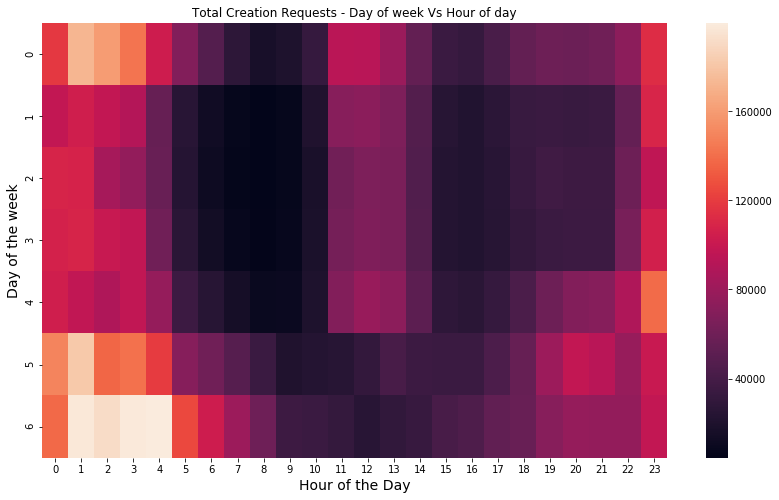

In [73]:
df = df_req.groupby(["Cre_Day_No_Week", "Cre_HourOfDay"])["created_at"].agg("count").reset_index(name = "count")
pivoted_df = df.pivot("Cre_Day_No_Week", "Cre_HourOfDay", "count")
#pivoted_df.head()
plt.figure(figsize=(14,8))
sns.heatmap(pivoted_df)
plt.title("Total Creation Requests - Day of week Vs Hour of day")
plt.ylabel("Day of the week", fontsize = 14)
plt.xlabel("Hour of the Day", fontsize = 14)
plt.show()

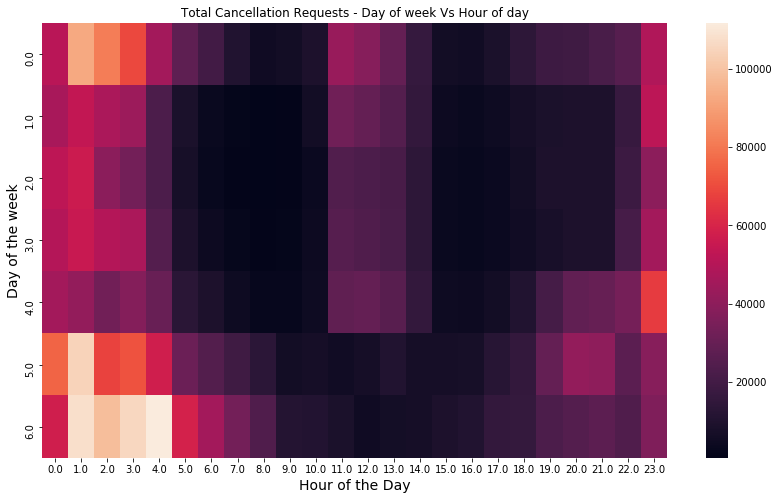

In [74]:
df = df_req.groupby(["Ccl_Day_No_Week", "Ccl_HourOfDay"])["Ccl_Day_No_Week"].agg("count").reset_index(name = "count")
pivoted_df = df.pivot("Ccl_Day_No_Week", "Ccl_HourOfDay", "count")
#pivoted_df.head()
plt.figure(figsize=(14,8))
sns.heatmap(pivoted_df)
plt.title("Total Cancellation Requests - Day of week Vs Hour of day")
plt.ylabel("Day of the week", fontsize = 14)
plt.xlabel("Hour of the Day", fontsize = 14)
plt.show()

Some Exploratory questions to ask are:  
1) are the cancellation rates due to higher duration estimate? (so that they might choose other means of transport?  
2) are the cancellation rates due to higher distance estimate ? (this is not a good question because they mostly know their     destniation and the distance)  
3) Are cancellation higher rates due to frequent timedouts (drivers not being able to accept due to more volume of requests and less vehicle available to serve them?  

In [95]:
type(df_req["cancel_create_diff"][0])

numpy.float64

In [96]:
df_req["cancel_create_diff"][0]

5.0

In [99]:
#converted the difference from timedelta format to seconds format
df_req["cancel_create_diff"] = [x.seconds for x in df_req["cancel_create_diff"]]

In [108]:
#the top 5 time periods within which the cancellation has happened (all are within 5 seconds)
top_5_cancellation = df_req["cancel_create_diff"].value_counts()[:5].values

In [148]:
#proportion of top 5 time periods with respect to total cancellation counts
#sum(top_5_cancellation) / len(df_req["cancel_create_diff"])
#the percentage of top 5 cancellation request time periods vs total row  - total cancellation period 
#len_df_req_cancel  = len(df_req.loc[df_req["cancelled_at_day"] != 0])
print("the percentage of top 5 cancellation time requests  {}% ".format(round(((sum(top_5_cancellation))/ len_df_req_cancel)*100,2)))
print(df_req["cancel_create_diff"].value_counts()[:5])

the percentage of top 5 cancellation time requests  40.27% 
2.0    554374
3.0    444274
4.0    286607
1.0    217907
5.0    169853
Name: cancel_create_diff, dtype: int64


It can be seen from the first column of the analysis, the top 5 time period remains within 5 seconds.<font color = "green"> <B> We can see from the above figure that 40% of the total cancellation requests are below 5 seconds. </B> </font>

In [208]:
df_req.head()

,id_request,id_passenger,id_city,from_latitude,from_longitude,to_latitude,to_longitude,created_at,cancelled_at,timedout_at,...,Cre_HourOfDay,Cre_MinOfDay,Ccl_Day_No_Week,Ccl_Day_Name,Ccl_Week_No,Ccl_HourOfDay,Ccl_MinOfDay,cancel_create_diff,timedout_created_diff,cre_can_less_5_sec
0,3513924914,2590587260,1,19.593987,-99.039326,19.578557,-99.041541,2019-09-19 04:07:56,2019-09-19 04:08:01,NaT,...,4,7,3.0,Thursday,38.0,4.0,8.0,5.0,NaT,True
1,1594446343,1501665959,1,19.303307,-98.886432,19.261320,-98.878055,2019-09-19 22:44:43,0,NaT,...,22,44,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,2312709661,1546836297,1,19.326330,-99.121689,19.310036,-99.124487,2019-09-19 23:00:37,0,NaT,...,23,0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,1498373688,2884063389,1,19.401755,-99.175365,19.400671,-99.188342,2019-09-20 16:31:24,0,NaT,...,16,31,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,197696634,2893722658,1,19.392388,-99.057337,19.370834,-99.005069,2019-09-20 23:26:56,2019-09-20 23:29:31,NaT,...,23,26,4.0,Friday,38.0,23.0,29.0,155.0,NaT,False


In [149]:
#10425144- total len of df_req
#4154018 - len of df_req not null 
#6271126 - len of df_req being null

In [ ]:
#boolean column for requests cancelled less than or equalto 5 seconds
df_req["cre_can_less_5_sec"] = [df_req["cancel_create_diff"][i] <= 5.0 if math.isnan(df_req["cancel_create_diff"][i]) != True else np.nan for i in range(len(df_req))]

<B> The above feature engineering represented as <font color = "blue"> "cre_can_less_5_sec"</font> column gives information about the requests that has been cancelled within 5 seconds from the time of creation of requests. Now we can use this feature to understand various perspective of request.csv data <B> <I> <font color = "blue"> Let's first analyze if the there are any patterns with respect to a particular passenger trying to cancel rides often within first 5 seconds of request for a ride. </I></font>

In [209]:
df_req.head()

,id_request,id_passenger,id_city,from_latitude,from_longitude,to_latitude,to_longitude,created_at,cancelled_at,timedout_at,...,Cre_HourOfDay,Cre_MinOfDay,Ccl_Day_No_Week,Ccl_Day_Name,Ccl_Week_No,Ccl_HourOfDay,Ccl_MinOfDay,cancel_create_diff,timedout_created_diff,cre_can_less_5_sec
0,3513924914,2590587260,1,19.593987,-99.039326,19.578557,-99.041541,2019-09-19 04:07:56,2019-09-19 04:08:01,NaT,...,4,7,3.0,Thursday,38.0,4.0,8.0,5.0,NaT,True
1,1594446343,1501665959,1,19.303307,-98.886432,19.261320,-98.878055,2019-09-19 22:44:43,0,NaT,...,22,44,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,2312709661,1546836297,1,19.326330,-99.121689,19.310036,-99.124487,2019-09-19 23:00:37,0,NaT,...,23,0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,1498373688,2884063389,1,19.401755,-99.175365,19.400671,-99.188342,2019-09-20 16:31:24,0,NaT,...,16,31,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,197696634,2893722658,1,19.392388,-99.057337,19.370834,-99.005069,2019-09-20 23:26:56,2019-09-20 23:29:31,NaT,...,23,26,4.0,Friday,38.0,23.0,29.0,155.0,NaT,False


In [228]:
id_pass_list_index = list(df_req.loc[df_req["cre_can_less_5_sec"] == True].groupby("id_passenger")["id_request"].count().index)
id_pass_list_val = list(df_req.loc[df_req["cre_can_less_5_sec"] == True].groupby("id_passenger")["id_request"].count().values)

In [229]:
pass_list = tupler(id_pass_list_index,id_pass_list_val)

In [346]:
#import operator
#pass_list.sort(key = operator.itemgetter(1))
pass_list_sort = pass_list[-21:][::-1]
for i,j in pass_list_sort:
    print("The passenger with id {} has {} cancellation requests within 5 seconds".format(i,j))

The passenger with id 3316479091 has 370 cancellation requests within 5 seconds
The passenger with id 1195735680 has 338 cancellation requests within 5 seconds
The passenger with id 3057540022 has 298 cancellation requests within 5 seconds
The passenger with id 1494610311 has 254 cancellation requests within 5 seconds
The passenger with id 1864961307 has 233 cancellation requests within 5 seconds
The passenger with id 3993690883 has 228 cancellation requests within 5 seconds
The passenger with id 946190519 has 227 cancellation requests within 5 seconds
The passenger with id 4185087271 has 226 cancellation requests within 5 seconds
The passenger with id 1159418890 has 226 cancellation requests within 5 seconds
The passenger with id 4077594337 has 224 cancellation requests within 5 seconds
The passenger with id 3033869202 has 223 cancellation requests within 5 seconds
The passenger with id 1738280224 has 222 cancellation requests within 5 seconds
The passenger with id 82122439 has 211 ca

<font color = "red"> <B> The above analysis shows a basic EDA of the top 20 passengers with most cancellations within 5 seconds from the time of request </B> </font> We can now compare the timestamp between the request cancellations to see if there are ay patterns to observe and understand fraud behaviour if exists

In [ ]:
#downloading data for tableau viz
df_req.loc[df_req["cre_can_less_5_sec"] == True][["id_passenger","id_city","from_latitude","from_longitude","to_latitude","to_longitude","cancel_create_diff","cre_can_less_5_sec"]].to_excel("passenger_data.xlsx")

In [262]:
df_req.loc[df_req["cre_can_less_5_sec"] == True].groupby("id_city")["id_passenger"].count()

id_city
1    1646804
2      19710
3       8342
Name: id_passenger, dtype: int64

In [269]:
print("The percentage of passenger who cancel from city id 1 is {}%".format(round(1646804/(1646804 + 19710 + 8342)*100,2)))

The percentage of passenger who cancel from city id 1 is 98.33%


<B> from the above results, we can see that 98.3% of the cancellation requests that are cancelled within 5 seconds are made from the city with id 1 </B>. That is pretty higher!!!

In [ ]:
#passenger device/model analysis
df_req["device"] = [df_req["passenger_device"][i].split("/")[0] for i in range(len(df_req["passenger_device"]))]
df_req["model"] = [df_req["passenger_device"][i].split("/")[1] for i in range(len(df_req["passenger_device"]))]

In [289]:
df_req.head()

,id_request,id_passenger,id_city,from_latitude,from_longitude,to_latitude,to_longitude,created_at,cancelled_at,timedout_at,...,Cre_MinOfDay,Ccl_Day_No_Week,Ccl_Day_Name,Ccl_Week_No,Ccl_HourOfDay,Ccl_MinOfDay,cancel_create_diff,timedout_created_diff,cre_can_less_5_sec,device
0,3513924914,2590587260,1,19.593987,-99.039326,19.578557,-99.041541,2019-09-19 04:07:56,2019-09-19 04:08:01,NaT,...,7,3.0,Thursday,38.0,4.0,8.0,5.0,NaT,True,PIXI5-6_4G
1,1594446343,1501665959,1,19.303307,-98.886432,19.261320,-98.878055,2019-09-19 22:44:43,0,NaT,...,44,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,tissot_sprout
2,2312709661,1546836297,1,19.326330,-99.121689,19.310036,-99.124487,2019-09-19 23:00:37,0,NaT,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,deen_sprout
3,1498373688,2884063389,1,19.401755,-99.175365,19.400671,-99.188342,2019-09-20 16:31:24,0,NaT,...,31,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,HWNXT
4,197696634,2893722658,1,19.392388,-99.057337,19.370834,-99.005069,2019-09-20 23:26:56,2019-09-20 23:29:31,NaT,...,26,4.0,Friday,38.0,23.0,29.0,155.0,NaT,False,dream2lte


<B> the above feature engineering is done to separate the device and model names. This will help us analyze if there are any patterns in cancellation devices. Also, we have the top 20 most cancelled passenger id and we can now see if fraudsters are using devices or devices to make any fraud attempts or hacks </B>

In [290]:
#Top device analysis - Basic Exploratory Analysis
dev_index = df_req["device"].value_counts().index
dev_values = df_req["device"].value_counts().values
dev_ind_val_list = tupler(dev_index, dev_values)
dev_ind_val_list.sort(key = operator.itemgetter(1), reverse = True)
print(dev_ind_val_list[0:20])

[('HWJKM-H', 284161), ('HWANE', 262853), ('iPhone7,2', 242297), ('aljeter', 226180), ('iPhone9,3', 215735), ('ocean', 177103), ('HWSNE', 163062), ('deen_sprout', 161172), ('iPhone8,1', 160196), ('iPhone10,5', 158976), ('potter_n', 154726), ('iPhone9,4', 149796), ('HWMAR', 141993), ('nora_8917', 140171), ('iPhone10,4', 137003), ('on7xelte', 133108), ('iPhone11,8', 124275), ('evert_n', 122556), ('cedric', 118574), ('hero2lte', 118304)]


In [309]:
df_req.head()

,id_request,id_passenger,id_city,from_latitude,from_longitude,to_latitude,to_longitude,created_at,cancelled_at,timedout_at,...,Cre_MinOfDay,Ccl_Day_No_Week,Ccl_Day_Name,Ccl_Week_No,Ccl_HourOfDay,Ccl_MinOfDay,cancel_create_diff,timedout_created_diff,cre_can_less_5_sec,device
0,3513924914,2590587260,1,19.593987,-99.039326,19.578557,-99.041541,2019-09-19 04:07:56,2019-09-19 04:08:01,NaT,...,7,3.0,Thursday,38.0,4.0,8.0,5.0,NaT,True,PIXI5-6_4G
1,1594446343,1501665959,1,19.303307,-98.886432,19.261320,-98.878055,2019-09-19 22:44:43,0,NaT,...,44,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,tissot_sprout
2,2312709661,1546836297,1,19.326330,-99.121689,19.310036,-99.124487,2019-09-19 23:00:37,0,NaT,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,deen_sprout
3,1498373688,2884063389,1,19.401755,-99.175365,19.400671,-99.188342,2019-09-20 16:31:24,0,NaT,...,31,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,HWNXT
4,197696634,2893722658,1,19.392388,-99.057337,19.370834,-99.005069,2019-09-20 23:26:56,2019-09-20 23:29:31,NaT,...,26,4.0,Friday,38.0,23.0,29.0,155.0,NaT,False,dream2lte


In [314]:
#only top 40 id
top_40_pass_list_sort_id = [i for i, j in pass_list_sort]

#only top 40 id
top_40_pass_list_sort_val = [j for i, j in pass_list_sort]

In [318]:
#simple script to see what device the passenger with most cancellation request use (top 40) 
for i in range(len(top_40_pass_list_sort_id)):
    print(df_req.loc[df_req["id_passenger"] == top_40_pass_list_sort_id[i]]["device"].value_counts())

lotus    392
Name: device, dtype: int64
albus               373
athene_f              5
c4e1751c489cb7ab      1
Name: device, dtype: int64
star2qltechn    359
Name: device, dtype: int64
HWTRT-Q    327
Name: device, dtype: int64
b2lssn    307
Name: device, dtype: int64
star2qltechn    282
Name: device, dtype: int64
HWWAS-H    307
Name: device, dtype: int64
HWNXT    361
Name: device, dtype: int64
HWPOT-H    290
Name: device, dtype: int64
b2lssn    323
Name: device, dtype: int64
woods_f    288
Name: device, dtype: int64
HWTRT-Q    295
Name: device, dtype: int64
HWPOT-H    283
Name: device, dtype: int64
HWANE    251
Name: device, dtype: int64
j7elte    295
Name: device, dtype: int64
HWNXT    331
Name: device, dtype: int64
HWTRT-Q    274
Name: device, dtype: int64
hwALE-H    412
Name: device, dtype: int64
b2lssn    272
Name: device, dtype: int64
HWNXT    270
Name: device, dtype: int64
HWTRT-Q    273
Name: device, dtype: int64
pettyl    275
Name: device, dtype: int64
HWTRT-Q    274
Name: dev

In [321]:
#please check the below passenger as he/she uses 3 separate devices
df_req.loc[df_req["id_passenger"] == top_40_pass_list_sort_id[1]]["device"].value_counts()

albus               373
athene_f              5
c4e1751c489cb7ab      1
Name: device, dtype: int64

In [323]:
top_40_pass_list_sort_id[1]

1195735680

<B> The above analysis shows that the passenger with id <font color = "red">  1195735680 </font> uses 3 different devices to log in and perform the requests. This seems little spooky but still further analysis is needed to support any statements </B>

In [324]:
df_req.loc[df_req["id_passenger"] == top_40_pass_list_sort_id[-11]]["device"].value_counts()

HWSTK-HF     203
nora_8917     67
Name: device, dtype: int64

In [325]:
top_40_pass_list_sort_id[-11]

1757278340

<B> The above analysis shows that the passenger with id <font color = "red">  1757278340 </font> uses 3 different devices to log in and perform the requests. This seems little spooky but still further analysis is needed to support any statements </B>

<font color = "blue"> Let us check if these id are in the list of passengers who have cancelled with 5 seconds </font>

In [333]:
pass_list_ind = [i for i,j in pass_list]

In [340]:
1757278340 in pass_list_ind

True

In [341]:
1195735680 in pass_list_ind

True

<B> <font color = "green"> Surprisingly these Passenger have cancelled requests within five seconds from the time of booking </font> <B>

In [342]:
#fetching the index of the passenger ID 1757278340 to extract the number of cancelled requests under 5 seconds
pass_list_ind.index(1757278340)

210164

In [343]:
#fetching the index of the passenger ID 1195735680 to extract the number of cancelled requests under 5 seconds
pass_list_ind.index(1195735680)

210193

In [344]:
pass_list[210164]

(1757278340, 185)

In [345]:
pass_list[210193]

(1195735680, 338)

Pass_list contains the list of tuples, with each tuple containing 2 elements. <font color = "blue">Passenger id and their respective number of cancellation requests under 5 seconds. </font>.<B> These two passengers who have used different devices to make requests (which is a bit uncommon) and have around   <font color = "red"> 185 and 338  </font> cancelled requests with 5 seconds (which is uncommon as well) </B>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
color = sns.color_palette()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

df_ride = pd.read_csv("/kaggle/input/taxi-mexico-data/ride.csv")


print(df_ride["revenue"].min())
print(df_ride["revenue"].max())
print(df_ride["revenue"].mean())
print(df_ride["revenue"].std())

df_ride.isnull().sum(axis = 0)



sns.set()
sns.pairplot(df_ride[['distance', 'revenue', 'ride_total_distance', 'duration']], size = 6)
plt.show()


sns.set()
sns.pairplot(df_ride[['distance', 'revenue', 'ride_total_distance', 'duration']], size = 3)
plt.show()



revenue_dist_row = df_ride.loc[(df_ride["distance"] > 10) & (df_ride["revenue"] == 0.0)]
total_dist_revenue_row = df_ride.loc[(df_ride["ride_total_distance"] == 0) & (df_ride["revenue"] > 0.0)]
duration_revenue_row = df_ride.loc[(df_ride["revenue"] == 0) & (df_ride["duration"] > 0.0)]